In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

In [3]:
pwd

'c:\\Users\\Myles\\Documents\\GitHub\\Project2'

In [4]:
csvpath = Path('/Users/Myles/Documents/GitHub/Project2/ESG_Data_Cleaned.csv')

In [5]:
esg_df = pd.read_csv(csvpath, index_col='Year')

In [6]:
esg_df

,Country Name,Country Code,"Agriculture, forestry, and fishing, value added (% of GDP)","Fertility rate, total (births per woman)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)",Population ages 65 and above (% of total population),CO2 emissions (metric tons per capita)
Year,,,,,,,,
1960,Australia,AUS,NaN,3.453000,70.817073,24.8,8.610618,8.582937
1960,Caribbean small states,CSS,NaN,5.600340,62.746306,NaN,4.136085,1.401336
1960,Central African Republic,CAF,NaN,5.840000,36.249000,283.1,4.998109,0.058607
1960,Central Europe and the Baltics,CEB,NaN,2.497094,67.821389,NaN,7.214899,5.228903
1960,East Asia & Pacific,EAS,NaN,5.393637,48.429121,NaN,3.865390,1.182973
...,...,...,...,...,...,...,...,...
2018,Latin America & Caribbean,LCN,NaN,2.027393,75.440849,NaN,8.443344,2.637363
2018,Middle East & North Africa,MEA,NaN,2.808926,74.088833,NaN,5.182127,5.638657
2018,North America,NAC,NaN,1.706038,78.986791,NaN,15.952731,15.270876


In [7]:
esg_df = esg_df.drop(['Agriculture, forestry, and fishing, value added (% of GDP)','Mortality rate, under-5 (per 1,000 live births)','Country Code'],axis=1)
esg_df

,Country Name,"Fertility rate, total (births per woman)","Life expectancy at birth, total (years)",Population ages 65 and above (% of total population),CO2 emissions (metric tons per capita)
Year,,,,,
1960,Australia,3.453000,70.817073,8.610618,8.582937
1960,Caribbean small states,5.600340,62.746306,4.136085,1.401336
1960,Central African Republic,5.840000,36.249000,4.998109,0.058607
1960,Central Europe and the Baltics,2.497094,67.821389,7.214899,5.228903
1960,East Asia & Pacific,5.393637,48.429121,3.865390,1.182973
...,...,...,...,...,...
2018,Latin America & Caribbean,2.027393,75.440849,8.443344,2.637363
2018,Middle East & North Africa,2.808926,74.088833,5.182127,5.638657
2018,North America,1.706038,78.986791,15.952731,15.270876


In [8]:
esg_df = esg_df.dropna()

In [9]:
esg_df.head()

,Country Name,"Fertility rate, total (births per woman)","Life expectancy at birth, total (years)",Population ages 65 and above (% of total population),CO2 emissions (metric tons per capita)
Year,,,,,
1960,Australia,3.453000,70.817073,8.610618,8.582937
1960,Caribbean small states,5.600340,62.746306,4.136085,1.401336
1960,Central African Republic,5.840000,36.249000,4.998109,0.058607
1960,Central Europe and the Baltics,2.497094,67.821389,7.214899,5.228903
1960,East Asia & Pacific,5.393637,48.429121,3.865390,1.182973


In [10]:
# new_esg = esg_df.copy()

# #Transform data
# new_esg['Fertility rate, total (births per woman)']=new_esg['Fertility rate, total (births per woman)']/100
# new_esg['Life expectancy at birth, total (years)']=new_esg['Life expectancy at birth, total (years)']/100
# new_esg['Population ages 65 and above (% of total population)'] = new_esg['Population ages 65 and above (% of total population)']/100

In [11]:
# new_esg

In [12]:
def location_filter(location_name):
    new_df = esg_df[esg_df['Country Name']==f'{location_name}']
    return(new_df)

In [13]:
australia_df=[]
caribbean_small_sts_df = []
central_african_republic_df = []
central_europe_baltics_df = []
east_asia_pacific_df = []
europe_central_asia_df = []
latin_america_caribbean_df = []
middle_east_north_africa_df = []
north_america_df = []
sub_saharan_africa_df = []
world_df = []

australia_df = location_filter('Australia')
caribbean_small_sts_df = location_filter('Caribbean small states')
central_african_republic = location_filter('Central African Republic')
central_europe_baltics = location_filter('Central Europe and the Baltics')
east_asia_pacific = location_filter('East Asia & Pacific')
europe_central_asia = location_filter('Europe Central Asia')
latin_america_caribbean = location_filter('Latin America & Caribbean')
middle_east_north_africa = location_filter('Middle East & North Africa')
north_america = location_filter('North America')
sub_saharan_africa = location_filter('Sub-Saharan Africa')
world = location_filter('World')

In [14]:
australia_df.head()

,Country Name,"Fertility rate, total (births per woman)","Life expectancy at birth, total (years)",Population ages 65 and above (% of total population),CO2 emissions (metric tons per capita)
Year,,,,,
1960,Australia,3.453,70.817073,8.610618,8.582937
1961,Australia,3.540,70.973171,8.630204,8.641569
1962,Australia,3.442,70.942439,8.640327,8.835688
1963,Australia,3.332,70.911707,8.642495,9.226440
1964,Australia,3.146,70.880976,8.635085,9.759073


Australia Analysis

In [15]:
#Separate the features (X) from the Target (Y)
y = australia_df['CO2 emissions (metric tons per capita)']
X = australia_df.drop(['CO2 emissions (metric tons per capita)', 'Country Name'], axis = 1)

In [16]:
X.head()

,"Fertility rate, total (births per woman)","Life expectancy at birth, total (years)",Population ages 65 and above (% of total population)
Year,,,
1960,3.453,70.817073,8.610618
1961,3.540,70.973171,8.630204
1962,3.442,70.942439,8.640327
1963,3.332,70.911707,8.642495
1964,3.146,70.880976,8.635085


In [17]:
y.head()

Year
1960    8.582937
1961    8.641569
1962    8.835688
1963    9.226440
1964    9.759073
Name: CO2 emissions (metric tons per capita), dtype: float64

In [18]:
#Split our data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(44, 3) (15, 3) (44,) (15,)


In [21]:
from sklearn.preprocessing import StandardScaler
#Initiate StandardScaler Instance. Fit the data and scale the data

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#y_train_scaled = scaler.transform(y_train)
#y_test_scaled = scaler.transform(y_test)


In [22]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model and fit it to the data

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
# Make predictions using the Scaled Testing Data

predicted_y_values = model.predict(X_test_scaled)


In [24]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Emissions"] = predicted_y_values
Results = Results.sort_index()

In [29]:
Results.head()

,CO2 emissions (metric tons per capita),Predicted Emissions
Year,,
1960,8.582937,9.170435
1963,9.226440,9.435020
1965,10.622321,9.946754
1968,11.210168,10.664943
1972,11.951632,11.554472


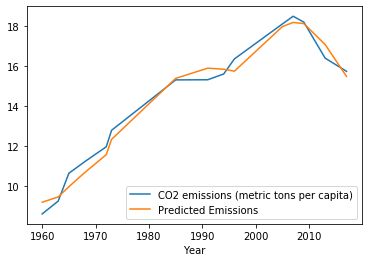

In [26]:
Results.plot()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
mse = mean_squared_error(
    Results["CO2 emissions (metric tons per capita)"],
    Results["Predicted Emissions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.4423292660859765


In [31]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_train_scaled)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["CO2 emissions (metric tons per capita)"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.6002202472627489
